# Part II - Advanced EDA and Baseline Modeling

This is the second notebook of capstone project. It continues from the first notebook, "LinkedIn_Preliminary_EDA". In the previous notebook, we explored the LinkedIn Job Postings data from 2023, and were motivated by the following question:

> How do different job attributes affect the number of views for a job posting? Which job attribute should companies emphasize to raise more views? Which job attribute do job applicants prioritize when searching for a job?

We cleaned the data and conducted some basic EDA to begin answering tis quesiton.

Now we will conduct further analysis through advanced EDA and preprocessing to prepare a dataframe for modeling.

**Author: JJ Park**

**Date: 26/03/2024**

### Dataset

Dataset has been sourced from: https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/data. 

<a id= 'table' ></a>
### Table of Contents

1. [Data Dictionary](#Dictionary)  
2. [Data Loading](#Load)
3. [Data Preprocessing - Feature Engineering](#Feature)
4. [Basic Model Preprocessing](#Preprocess)
5. [Modeling - Linear Regression](#Linear)
6. [Modeling - Random Forest Regressor](#Random)
7. [Modeling - XG Boost](#XG)
7. [Summary](#Summary)

<a id = 'Dictionary'><a/>   
## Data Dictionary
    
---

1. `job_id`: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/{ job_id })
2. `company_id`: Identifier for the company associated with the job posting (maps to companies.csv)
3. `title`: Job title
4. `description`: Job description
5. `max_salary`: Maximum salary
6. `med_salary`: Median salary
7. `min_salary`: Minimum salary
8. `pay_period`: Pay period for salary (Hourly, Monthly, Yearly)
9. `formatted_work_type`: Type of work (Fulltime, Parttime, Contract)
10. `location`: Job location
11. `applies`: Number of applications that have been submitted
12. `original_listed_time`: Original time the job was listed
13. `remote_allowed`: Whether job permits remote work
14. `views`: Number of times the job posting has been viewed
15. `job_posting_url`: URL to the job posting on a platform
16. `application_url`: URL where applications can be submitted
17. `application_type`: Type of application process (offsite, complex/simple onsite)
18. `expiry`: Expiration date or time for the job listing
19. `closed_time`: Time to close job listing
20. `formatted_experience_level`: Job experience level (entry, associate, executive, etc)
21. `skills_desc`: Description detailing required skills for job
22. `listed_time`: Time when the job was listed
23. `posting_domain`: Domain of the website with application
24. `sponsored`: Whether the job listing is sponsored or promoted
25. `work_type`: Type of work associated with the job
26. `currency`: Currency in which the salary is provided
27. `compensation_type`: Type of compensation for the job
28. `scraped`: Has been scraped by `details_retriever`

<a id = 'Load'><a/>   
## Data Loading
    
---

Let's begin by importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [3]:
# Read in the cleaned data from previous notebook
df = pd.read_csv('../Data/clean_linkedin_job_posting.csv')

Let's check the cleaned dataset.

In [4]:
# Check the first few rows
df.head()

,job_id,company_id,title,description,med_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,application_type,expiry,formatted_experience_level,listed_time,sponsored,reposted,skills_present,application_portal
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5250.00,MONTHLY,Full-time,"Little River, SC",5.0,2023-11-04 05:26:40,0.0,9.0,OffsiteApply,2023-12-04 03:53:20,Entry level,2023-11-04 05:26:40,0,0,0,1
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,73028.00,Not Specified,Full-time,"Beaver Dam, WI",5.0,2023-11-04 02:40:00,0.0,16.0,OffsiteApply,2023-12-04 03:53:20,Not Specified,2023-11-04 02:40:00,0,0,0,1
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,73028.00,Not Specified,Full-time,"Bessemer, AL",5.0,2023-11-04 02:40:00,0.0,16.0,OffsiteApply,2023-12-04 03:53:20,Not Specified,2023-11-04 02:40:00,0,0,1,1
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,22.27,HOURLY,Full-time,"Aliso Viejo, CA",5.0,2023-11-04 02:40:00,0.0,1.0,OffsiteApply,2023-12-04 03:53:20,Entry level,2023-11-04 02:40:00,0,0,0,1
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",240895.00,YEARLY,Full-time,United States,5.0,2023-11-02 20:06:40,1.0,16.0,OffsiteApply,2023-12-04 03:53:20,Mid-Senior level,2023-11-04 05:26:40,0,1,0,1


In [5]:
# Checking the number of rows and columns in the cleaned dataset
df.shape

(33246, 20)

Let's ensure that the data is actually clean.

In [6]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   med_salary                  33246 non-null  float64
 5   pay_period                  33246 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   location                    33246 non-null  object 
 8   applies                     33246 non-null  float64
 9   original_listed_time        33246 non-null  object 
 10  remote_allowed              33246 non-null  float64
 11  views                       33246 non-null  float64
 12  application_type            33246 non-null  object 
 13  expiry                      332

We can observe the following:
- We have 33246 rows with 20 columns. There are 10 numerical and 10 categorical variables. However, the `original_listed_time`, `expiry` and `listed_time` columns have been converted into object datatype from datetime. We will convert them back into datetime in the future analysis.
- No null values present.

Let's ensure that there is genuinely no null data.

In [7]:
# Checking null values
df.isna().sum()

job_id                        0
company_id                    0
title                         0
description                   0
med_salary                    0
pay_period                    0
formatted_work_type           0
location                      0
applies                       0
original_listed_time          0
remote_allowed                0
views                         0
application_type              0
expiry                        0
formatted_experience_level    0
listed_time                   0
sponsored                     0
reposted                      0
skills_present                0
application_portal            0
dtype: int64

We see that the dataset is clean with no missing values as we addressed them in our previous notebook.

Let's also check for duplicates.

In [8]:
# Checking duplicate rows
df.duplicated().sum()

0

There are no duplicates either. Now we can conduct some advanced EDA and data preprocessing for modeling. Let's start by looking at some categorical variables.

<a id = 'Feature'><a/>   
## Data Preprocessing - Feature Engineering
    
---

First, let's separate variables by their respective data types.

In [9]:
# Selecting all the columns with 'object' datatype
df.select_dtypes(["object"]).columns

Index(['title', 'description', 'pay_period', 'formatted_work_type', 'location',
       'original_listed_time', 'application_type', 'expiry',
       'formatted_experience_level', 'listed_time'],
      dtype='object')

There are 10 categorical variables in the dataset. Let's check for numerical ones.

In [10]:
# Selecting all the columns with 'float' and 'int' datatypes
df.select_dtypes(["float", "int"]).columns

Index(['job_id', 'company_id', 'med_salary', 'applies', 'remote_allowed',
       'views', 'sponsored', 'reposted', 'skills_present',
       'application_portal'],
      dtype='object')

There are 10 numerical variables in the dataset.

As part of the advanced EDA, we will conduct some feature engineering to convert all the categorical variables into numerical variables. We will leave out the `title` and `description` columns for now as we plan on conducting various text analysis tasks to extract insights and patterns from the text data. 

### Categorical Variables

First, let's take a look at `application_type` column.

In [11]:
df['application_type'].value_counts()

application_type
OffsiteApply          20104
ComplexOnsiteApply    10723
SimpleOnsiteApply      2419
Name: count, dtype: int64

As we can see from above, there are three categories. For the simplicity, we will combine the "ComplexOnsiteApply" and "SimpleOnsiteApply" categories into a single category. Essentially, we are creating a binary column where "OffsiteApply" will be represented by the entries of 0, and "OnsiteApply" will be represented by the entries of 1.

In [12]:
# Turning the 'application_type' column into a binary column
df['application_method'] = df['application_type'].map({'OffsiteApply': 0, 'ComplexOnsiteApply': 1, 'SimpleOnsiteApply': 1})

In [13]:
# Check
df['application_method'].value_counts()

application_method
0    20104
1    13142
Name: count, dtype: int64

About 60 percent of the applications were offsite submissions and 40 percent were onsite submissions. Now drop the non binarized `application_type` column.

In [14]:
df.drop(columns='application_type', inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   med_salary                  33246 non-null  float64
 5   pay_period                  33246 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   location                    33246 non-null  object 
 8   applies                     33246 non-null  float64
 9   original_listed_time        33246 non-null  object 
 10  remote_allowed              33246 non-null  float64
 11  views                       33246 non-null  float64
 12  expiry                      33246 non-null  object 
 13  formatted_experience_level  332

Next we will look at `location`.

In [15]:
df['location'].value_counts()

location
United States         2341
New York, NY           818
Chicago, IL            534
Houston, TX            444
Dallas, TX             383
                      ... 
Edmonds, WA              1
Crawfordsville, IN       1
Winter Park, CO          1
Claremont, NC            1
Fergus Falls, MN         1
Name: count, Length: 4621, dtype: int64

As we can see, majority of the job postings were published from the United States, specified by popular cities within the United States. Our task is to extract country information to minimize the number of categories within the dataset. Let's separate the `location` data into two categories, United States and non-United States. 

In [16]:
# Create a new column 'is_usa' with binary values
def check_usa(location):
    if 'United States' in str(location):
        return 1
    elif ',' in str(location):
        return 1  # Assume it's in the USA if there's a comma (likely a city-state pair)
    else:
        return 0

df['is_usa'] = df['location'].apply(check_usa)

# Display the DataFrame with the new column
df['is_usa'].value_counts()

is_usa
1    31692
0     1554
Name: count, dtype: int64

Here, we have created a binary column called `is_usa`, which showcases whether the jobs were posted from the United States or not. Let's create a visualization to display the distribution of location, USA vs non-USA.

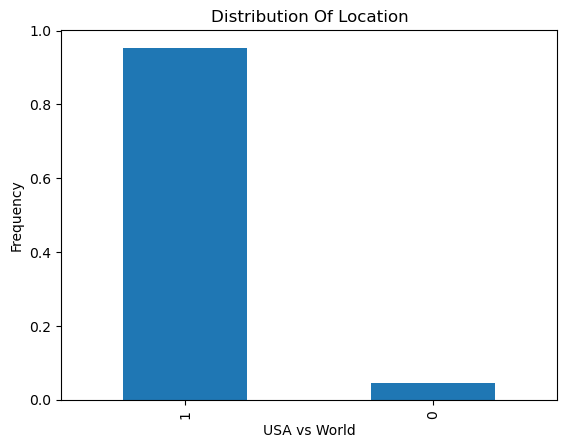

In [17]:
plt.figure()
df['is_usa'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Location'.title())
plt.xlabel("USA vs World")
plt.ylabel("Frequency")
plt.show()

As expected, majority of the job postings were from the US (roughly 95 percent), and the rest of the world (5 percent) were responsible for a small portion of job postings. Now we will drop the non-binarized `location` column.

In [18]:
df.drop(columns='location', inplace=True)

# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   med_salary                  33246 non-null  float64
 5   pay_period                  33246 non-null  object 
 6   formatted_work_type         33246 non-null  object 
 7   applies                     33246 non-null  float64
 8   original_listed_time        33246 non-null  object 
 9   remote_allowed              33246 non-null  float64
 10  views                       33246 non-null  float64
 11  expiry                      33246 non-null  object 
 12  formatted_experience_level  33246 non-null  object 
 13  listed_time                 332

In [20]:
# Save the DataFrame to a CSV file in the 'Data' folder
df.to_csv("../Data/cleaned_data.csv", index=False)

The `location` column has been dropped. We will shift our focus to time variables, including `original_listed_time`, `expiry` and `listed_time`. 

In [ ]:
df['original_listed_time'].value_counts()

In [ ]:
df['expiry'].value_counts()

In [ ]:
df['listed_time'].value_counts()

In [ ]:
df['listed_time'] = pd.to_datetime(df['listed_time'])

# Define time periods
time_periods = {
    'Morning': (pd.Timestamp('06:00:00').time(), pd.Timestamp('11:59:59').time()),
    'Afternoon': (pd.Timestamp('12:00:00').time(), pd.Timestamp('17:59:59').time()),
    'Evening': (pd.Timestamp('18:00:00').time(), pd.Timestamp('23:59:59').time()),
    'Night': (pd.Timestamp('00:00:00').time(), pd.Timestamp('05:59:59').time())
}

# Categorize listed_time into time periods
for period, (start, end) in time_periods.items():
    df[period] = df['listed_time'].apply(lambda x: start <= x.time() <= end)

# Plot distribution of each time period
time_period_counts = df[['Morning', 'Afternoon', 'Evening', 'Night']].sum()
time_period_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Listings by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

We can observe that all of the time variables are in the standard datetime format as we addressed them in the previous notebook. From the `listed_time` column, we can observe that majority of the jobs were posted from late afternoon to evening time period. Further analysis would be desired to unveil a relationship between the time job post is listed and number of views. However, since the dataset has limited amount of information regarding time (data collected over the period of two days, in two different months, 4 days in total), we cannot draw much meaningful insights from such a limited set of time data.

In [ ]:
# Sanity Check
df.info()

Instead, let's create dummy variables where we separate the timestamp into 'year', 'month', 'day', 'hour', 'minute' and 'second'. First, let's drop these newly created timestamp columns as they are not needed in our modeling.

In [ ]:
# Drop the original_listed_time, expiry, and listed_time columns
df.drop(['Morning', 'Afternoon', 'Evening', 'Night'], axis=1, inplace=True)

# Sanity Check
df.info()

In [ ]:
# Convert the remaining timestamp columns to datetime format
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'])
df['expiry'] = pd.to_datetime(df['expiry'])
#df['listed_time'] = pd.to_datetime(df['listed_time'])

In [ ]:
# Check
df.info()

All three time variables are now in the datetime format. We will proceed with extracting year, month, day, hour, minute, and second into separate columns.

In [ ]:
# Extract year, month, day, hour, minute, and second into separate columns
df['original_listed_year'] = df['original_listed_time'].dt.year
df['original_listed_month'] = df['original_listed_time'].dt.month
df['original_listed_day'] = df['original_listed_time'].dt.day
df['original_listed_hour'] = df['original_listed_time'].dt.hour
df['original_listed_minute'] = df['original_listed_time'].dt.minute
df['original_listed_second'] = df['original_listed_time'].dt.second

df['expiry_year'] = df['expiry'].dt.year
df['expiry_month'] = df['expiry'].dt.month
df['expiry_day'] = df['expiry'].dt.day
df['expiry_hour'] = df['expiry'].dt.hour
df['expiry_minute'] = df['expiry'].dt.minute
df['expiry_second'] = df['expiry'].dt.second

df['listed_year'] = df['listed_time'].dt.year
df['listed_month'] = df['listed_time'].dt.month
df['listed_day'] = df['listed_time'].dt.day
df['listed_hour'] = df['listed_time'].dt.hour
df['listed_minute'] = df['listed_time'].dt.minute
df['listed_second'] = df['listed_time'].dt.second

Let's check if all the time variables have been broken down into year, month, day, hour, minute and second dummy variables.

In [ ]:
df.sample(50)

In [ ]:
# Sanity Check
df.info()

All the time elements have been successfully extracted and sorted into columns respective to their time variables. Now we can drop the three original time variables: `original_listed_time`, `expiry` and `listed_time`.

In [ ]:
# Drop the original_listed_time, expiry, and listed_time columns
df.drop(['original_listed_time', 'expiry', 'listed_time'], axis=1, inplace=True)

# Sanity Check
df.info()

Save the preprocessed dataframe for the future analysis.

In [ ]:
# Save the preprocessed DataFrame to a CSV file in the 'Data' folder
df.to_csv("../Data/preprocessed_linkedin_job_posting.csv", index=False)

The three time variables have been dropped. Now we will apply one-hot encoding method to introduce dummy variables that can replace the leftover categorical variables and turn them into numerical datatype. 

In [ ]:
pd.get_dummies(df.select_dtypes('object')).shape

From above, we can observe that several new dummy variables have been introduced, a column for each category in each feature. The column size has increased from 35 to 52577, and this is mostly due to `title` and `description` as these variables hold a lot of features. 

In [ ]:
df['title'].value_counts()

In [ ]:
df['description'].value_counts()

The `title` and `description` columns together account for 52557 (22404 + 30153) features out of 52577 newly created dummy variables. Since these two text-heavy variables are flooding the number of columns, we will conduct baseline modeling without these two columns.

In [ ]:
# Drop title and description columns
df.drop(['title', 'description'], axis=1, inplace=True)

# Sanity Check
df.info()

Now we can regenerate our dataframe with the dummy variables included.

In [ ]:
pd.get_dummies(df)

In [ ]:
pd.get_dummies(df).shape

We can see that now we only have 50 columns instead of the previous 52577.

In [ ]:
pd.get_dummies(df).dtypes

In [ ]:
pd.get_dummies(df).info()

The preprocessing has been completed. We can now proceed to baseline modeling.

<a id = 'Preprocess'><a/>   
## Basic Model Preprocessing
    
---

In [ ]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from scipy.stats import f_oneway
from scipy import stats
import random
from itertools import combinations
from scipy.stats import kruskal
import scikit_posthocs as sp
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor

In [ ]:
# Converting categorical columns to dummy variables
dummy_df = pd.get_dummies(df, drop_first=True)
dummy_df.head()

Here, we have used 'drop_first=True' command to avoid multicollinearity, dropping first three dummy variables generated from 'pd.get_dummies' from `pay_period`, `formatted_work_type`, and `formatted_experience_level`. Let's create a heat map to observe the correlations among different job attributes.

In [ ]:
# Correlation matrix
correlation_matrix = dummy_df.corr()

In [ ]:
# Diagonal creation
diagonal_corr_matrix = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
diagonal_corr_matrix = diagonal_corr_matrix.fillna(0)

In [ ]:
# Heatmap
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(diagonal_corr_matrix, dtype=bool))
sns.heatmap(diagonal_corr_matrix, annot=False, cmap='coolwarm', cbar=True, mask=~mask)
plt.show()

In [ ]:
dummy_df.columns

In [ ]:
dummy_df.shape

In [ ]:
# Filter for correlations above 0.5
high_corr_pairs = diagonal_corr_matrix[abs(diagonal_corr_matrix) > 0.5]

# Iterate through the high correlation pairs and print them
for column1 in high_corr_pairs.columns:
    for column2 in high_corr_pairs.index:
        correlation = high_corr_pairs[column1][column2]
        if not np.isnan(correlation):
            print(f"Pair: {column1} - {column2}, Correlation: {correlation}")

There are several columns which has high collinearity. We have to conduct feature selection while doing linear regression. Hence, for now we will stick with vanilla baseline modeling with linear regression.

In [ ]:
# Set up the dependent and independent variable X and y
X = dummy_df.drop(columns=['views'])
y = dummy_df['views']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

<a id = 'Linear'><a/>   
## Linear Regression
    
---

Prior to running a linear regression, we will remove pairs of columns that reported high collinearity to find the best scores.

In [ ]:
# This is a Function to train and evaluate linear regression with column removal
def evaluate_model(X_train, X_test, y_train, y_test, columns_to_remove):
    
    # Removing specified columns
    X_train_filtered = X_train.drop(columns=[col for col in columns_to_remove if col in X_train.columns])
    X_test_filtered = X_test.drop(columns=[col for col in columns_to_remove if col in X_test.columns])

    #Scalling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_filtered)
    X_test_scaled = scaler.transform(X_test_filtered)

    # Fitting a linear regression model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions on training and test sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MAE for training and test sets
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    return mae_train, mae_test


# List of numerical columns for evaluation (These are the highly correlated columns.)
numerical_cols = ['applies', 'application_portal', 'reposted', 'application_method',
                  'original_listed_day', 'original_listed_month', 'expiry_month', 
                   'expiry_year', 'expiry_day', 'expiry_second', 'expiry_minute',
                  'listed_month', 'listed_day', 'listed_hour', 'original_listed_hour',
                  'original_listed_minute', 'listed_minute', 'listed_second', 'pay_period_YEARLY',
                  'original_listed_second', 'med_salary', 'pay_period_Not Specified',
                  'formatted_work_type_Part-time',
                  'formatted_work_type_Full-time']

# Initialize variables to keep track of the best model and its performance
best_model = None
best_mae_test = float('inf')
best_columns_removed = None

# Iterating over all possible combinations of columns to remove
for num_columns_to_remove in range(1, len(numerical_cols) + 1):
    for columns_to_remove_combination in combinations(numerical_cols, num_columns_to_remove):
        mae_train, mae_test = evaluate_model(X_train, X_test, y_train, y_test, columns_to_remove_combination)

        # Print MAPE and MAE scores for each combination
        print(f"Columns Removed: {columns_to_remove_combination}")
        print(f"MAE Train: {mae_train}")
        print(f"MAE Test: {mae_test}")
        print()

Columns Removed: ('application_method', 'listed_hour')  
MAE Train: 25.699548754830374  
MAE Test: 25.745284190220932  

Above is one of the combinations where the MAE test is lowest and difference between MAE test and train is low.

In [ ]:
X2 = dummy_df.drop(columns=["views", 'application_method', 'listed_hour'])
y2 = dummy_df['views']

# Splitting the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

Before we run the model, let's scale the test and train set first.

In [ ]:
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

In [ ]:
#linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train_scaled2, y_train2)

# Making predictions on the testing set
y_pred_test2 = model.predict(X_test_scaled2)

# Making predictions on the training set
y_pred_train2 = model.predict(X_train_scaled2)

# Evaluating the model using MAE y_pred_train
mae_train2 = mean_absolute_error(y_train2, y_pred_train2)
print(f"MAE TRAIN: {mae_train2}")

# Evaluating the model using MAE y_pred_test
mae_test2 = mean_absolute_error(y_test2, y_pred_test2)
print(f"MAE TEST: {mae_test2}")

# Calculating R-squared
r2 = r2_score(y_train2, y_pred_train2)
print(f"R-squared (R^2) value: {r2}")

# Calculating R-squared
r2 = r2_score(y_test2, y_pred_test2)
print(f"R-squared (R^2) value: {r2}")

The MAE on the training set is less than the MAE on the test set (25.7453 > 25.6995), hence it is not overfitted. However, the MAE score itself seems quite high. We will conduct further analysis to determine if the linear regression is ideal model to implement.

The R squared value looks good as it is greater than 0.5 and closer to 1 (0.7133). The train R squared is slightly higher than the test R squared, hence there is a possibility of an overfitting in the model.

In [ ]:
# Function to calculate the best fit line
def plot_best_fit_line(y_true, y_pred, ax, label):
    slope, intercept = np.polyfit(y_true, y_pred, 1)
    line = slope * y_true + intercept
    ax.plot(y_true, line, label=label, color='blue')

# Plotting the scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train2, y_pred_train2, alpha=0.5, label='Data Points')
plot_best_fit_line(y_train2, y_pred_train2, plt.gca(), 'Best Fit Line')
plt.plot([y_train2.min(), y_train2.max()], [y_train2.min(), y_train2.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plotting the scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test2, y_pred_test2, alpha=0.5, label='Data Points')
plot_best_fit_line(y_test2, y_pred_test2, plt.gca(), 'Best Fit Line')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

The plot does not show a strong linear relationship along the diagonal. Ideally, the closer our best fit line is to the ideal fit line, higher the chance of predicted values matching the actual values. From the test set, we can observe that the data points tend to deviate from the accurate predictions as the ideal fit line progresses to the right. 

Let's plot the residuals now and draw more insights.

In [ ]:
# Residuals
residuals = y_test2 - y_pred_test2
# Scatter plot of predicted values against residuals
plt.scatter(y_pred_test2, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Adding a horizontal line at y=0 for reference
plt.show()


The plot above displays heteroscedasticity, violating the assumption of homoscedasticity. Let's visualize Q-Q plot to further investigate residuals.

In [ ]:
# Creating a Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, plot=sns.mpl.pyplot)
plt.title('Q-Q Plot of Residuals')

plt.show()

The Q-Q plot above suggests that there might be some outliers in the dataset that are not clearly captured by the normal distribution. The tails of the distribution of the residuals seem to extend beyond what would be expected from a normal distribution.The S-shape of the plot suggests a departure from the normal distribution as the normal distribution has lighter tails, tails that mostly lie on the red line. Furthermore, the deviations from linearity in the QQ-plot indicate that the tails of the observed distribution are fatter than the tails of a normal distribution. Hence, there is excess kurtosis compared to a normal distribution, hinting that there is a heavy degree of risk due to residuals deviating from the perfect normal distribution line (red line).

Let's plot the distribution of residuals to show excess kurtosis.

In [ ]:
# Plot histogram with kernel density estimate
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals with Kernel Density Estimate')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The right tail is fatter than the left tail, implicating that there is an excess kurtosis. 

In [ ]:
# Accessing the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Displaying the coefficients and intercept
print("Intercept:", intercept)
for feature, coef in zip(X_train2.columns, coefficients):
    print(f"{feature}: {coef:.3f}")

The coefficients provide information regarding the direction and magnitude of the relationship between each feature and our target variable, `views`. Positive coefficients suggest a positive impact on the number of views, while the negative coefficients suggest a negative impact on the number of views. The magnitude of the coefficient represents the estimated change in the number of views for one-unit change in the corresponding feature. To improve the performance of the model, we can look into some regularization techniques like Ridge and Lasso. Cross validation is also useful to get a more robust estimate of the model performance.

From the observations above, we can conclude that the linear model isn't the best option. Hence, we will build a basic random forest and XGboost regressor models and observe their performances.

<a id = 'Random'><a/>   
## Random Forest 
    
---

In [ ]:
# Creating the model
model = RandomForestRegressor()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_test = model.predict(X_test)

# Making predictions on the training set
y_pred_train = model.predict(X_train)

# Calculating MAE for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Error (MAE) for TRAIN set: {mae_train}")

# Calculating MAE for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE) for TEST set: {mae_test}")

# Calculating R-squared
r2 = r2_score(y_train, y_pred_train)
print(f"R-squared (R^2) value TRAIN: {r2}")

# Calculating R-squared
r2 = r2_score(y_test, y_pred_test)
print(f"R-squared (R^2) value TEST: {r2}")

The MAE on the training set is significantly lower than the MAE on the test set (7.4926 < 19.6510), resulting the model to be overfitted. Moreover, the R squared values are pretty high (closer to 1.0), but the train R squared value is greater than test R squared value, indicating that there is an overfit.

Let's plot a scatter plot of actual points and predicted points for both train and test sets. We will set subsample equals to 200 so that every 200th sample is plotted here.

In [ ]:
# Creating a DataFrame with actual and predicted values for the training set
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})

# Creating a DataFrame with actual and predicted values for the test set
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Subsampling every 200th point
subsample_factor = 200
plt.figure(figsize=(6, 6))

# Creating a scatter plot for Actual values in the training set
plt.scatter(range(0, len(train_results), subsample_factor), 
            train_results['Actual'].values[::subsample_factor], 
            label='Actual', color='blue', marker='o', alpha=0.7)

# Creating a scatter plot for Predicted values in the training set
plt.scatter(range(0, len(train_results), subsample_factor), 
            train_results['Predicted'].values[::subsample_factor], 
            label='Predicted', color='orange', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values - Training Set')
plt.xlabel('Observation')
plt.ylabel('Values')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))

# Creating a scatter plot for Actual values in the testing set
plt.scatter(range(0, len(test_results), subsample_factor), 
            test_results['Actual'].values[::subsample_factor], 
            label='Actual', color='blue', marker='o', alpha=0.7)

# Creating a scatter plot for Predicted values in the testing set
plt.scatter(range(0, len(test_results), subsample_factor), 
            test_results['Predicted'].values[::subsample_factor], 
            label='Predicted', color='orange', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values - Testing Set')
plt.xlabel('Observation')
plt.ylabel('Values')
plt.legend()
plt.show()

Now let's plot the actual vs predicted with the best fit and ideal fit lines.

In [ ]:
# Function to calculate the best fit line
def plot_best_fit_line(y_true, y_pred, ax, label):
    slope, intercept = np.polyfit(y_true, y_pred, 1)
    line = slope * y_true + intercept
    ax.plot(y_true, line, label=label, color='blue')

# Plotting the scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Data Points')
plot_best_fit_line(y_train, y_pred_train, plt.gca(), 'Best Fit Line')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plotting the scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Data Points')
plot_best_fit_line(y_test, y_pred_test, plt.gca(), 'Best Fit Line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

The data points on the training set seems to be fairly close to the ideal fit line (accurate predictions). However, in the test set, as the line progresses right, the best fit line starts to deviate from the ideal fit line, and this difference suggests that the model is overfitting. Therefore, this model also needs further investigation to improve the overall performance. This can be achieved by addressing the identified limitations above, exploring feature selection techniques, and introducing more sophisticated modeling approaches to improve the predictive performance of the model.

Let's take a look at the XGBoost regressor model and observe the performance.

<a id = 'XG'><a/>   
## XGBoost
    
---

In [ ]:
# Creating an XGBoost regressor
xgb_model = XGBRegressor()

# Fit the model on the training data
xgb_model.fit(X_train, y_train, eval_metric='mae')

# Make predictions on the training set
y_pred_train_xgb= xgb_model.predict(X_train)

# Make predictions on the test set
y_pred_test_xgb = xgb_model.predict(X_test)

# MAE Calculations
mae_train = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test = mean_absolute_error(y_test, y_pred_test_xgb)

print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Absolute Error (MAE): {mae_test}")

# Calculating R-squared
r2 = r2_score(y_train, y_pred_train_xgb)
print(f"R-squared (R^2) value TRAIN: {r2}")

# Calculating R-squared
r2 = r2_score(y_test, y_pred_test_xgb)
print(f"R-squared (R^2) value TEST: {r2}")

The MAE on the training set is significantly lower than the MAE on the test set (13.1894 < 20.6489), resulting the model to be overfitted. Moreover, the R squared values are pretty high (closer to 1.0), but the train R squared value is greater than test R squared value, indicating that there is an overfit.

Let's plot a scatter plot of actual points and predicted points for both train and test sets. We will set subsample equals to 200 so that every 200th sample is plotted here.

In [ ]:
# Creating a DataFrame with actual and predicted values for the training set
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train_xgb})

# Creating a DataFrame with actual and predicted values for the test set
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_xgb})

# Subsampling every 200th point
subsample_factor = 200
plt.figure(figsize=(6, 6))

# Creating a scatter plot for Actual values in the training set
plt.scatter(range(0, len(train_results), subsample_factor), 
            train_results['Actual'].values[::subsample_factor], 
            label='Actual', color='blue', marker='o', alpha=0.7)

# Creating a scatter plot for Predicted values in the training set
plt.scatter(range(0, len(train_results), subsample_factor), 
            train_results['Predicted'].values[::subsample_factor], 
            label='Predicted', color='orange', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values - Training Set')
plt.xlabel('Observation')
plt.ylabel('Values')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))

# Creating a scatter plot for Actual values in the testing set
plt.scatter(range(0, len(test_results), subsample_factor), 
            test_results['Actual'].values[::subsample_factor], 
            label='Actual', color='blue', marker='o', alpha=0.7)

# Creating a scatter plot for Predicted values in the testing set
plt.scatter(range(0, len(test_results), subsample_factor), 
            test_results['Predicted'].values[::subsample_factor], 
            label='Predicted', color='orange', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values - Testing Set')
plt.xlabel('Observation')
plt.ylabel('Values')
plt.legend()
plt.show()

Now let's plot the actual vs predicted with the best fit and ideal fit lines.

In [ ]:
# Function to calculate the best fit line
def plot_best_fit_line(y_true, y_pred, ax, label):
    slope, intercept = np.polyfit(y_true, y_pred, 1)
    line = slope * y_true + intercept
    ax.plot(y_true, line, label=label, color='blue')

# Plotting the scatter plot for training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_xgb, alpha=0.5, label='Data Points')
plot_best_fit_line(y_train, y_pred_train_xgb, plt.gca(), 'Best Fit Line')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Plotting the scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_xgb, alpha=0.5, label='Data Points')
plot_best_fit_line(y_test, y_pred_test_xgb, plt.gca(), 'Best Fit Line')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Fit Line')
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()

The data points on the training set seems to be fairly close to the ideal fit line (accurate predictions). However, in the test set, as the line progresses right, the best fit line starts to deviate from the ideal fit line, and this difference suggests that the model is overfitting. Therefore, this model also needs further investigation to improve the overall performance. This can be achieved by addressing the identified limitations above, exploring feature selection techniques, and introducing more sophisticated modeling approaches to improve the predictive performance of the model.

Here's the performance comparison of each model:

| Model                   | MAE (Train) | MAE (Test) | R-squared (Train) | R-squared (Test) |
|-------------------------|-------------|------------|-------------------|------------------|
| Linear Regression       | 25.70       | 25.75      | 0.7391            | 0.7126           |
| Random Forest Regressor | 7.49        | 19.72      | 0.9633            | 0.7674           |
| XGBoost Regressor       | 13.19       | 20.65      | 0.9594            | 0.7116           |

From the table, the Random Forest regressor model seems to be the best model, we will conduct further analysis in the next notebook to confirm whether this is true or not and build a predictive model from it.

<a id = 'Summary'><a/>   
## Summary
    
---

In this notebook, we have performed advanced EDA, such as feature engineering and model preprocessing to prepare a dataset ready for baseline modeling. In the following notebook, we will delve deeper into modeling by applying advanced modeling strategies and feature selection tools to enhance the model performance. We will also introduce NLP with deep learning models to add more depth to our analysis. 

This notebook is continued on "Part_Three_NLP_and_Advanced_Modeling.ipynb" notebook in the "Notebook" file.